## P37 图像阈值处理

- 简单阈值设置(Simple thresholding)
- 自适应阈值设置(Adaptive thresholding)
- Otsu阈值设置(Otsu's thresholding)
- 主要函数: cv.threshold、 cv.adaptiveThreshold.

### cv.threshold()

retval, dst = cv.threshold(scr, thresh, maxval, type)

- retval: 返回的阈值
- dst: 阈值分割结果图像，与原始图像具有相同的大小和类型
- scr: 要分割的图像，可以值多通道的，8位或32位浮点型数值
- thresh: 阈值
- maxval:当type参数为THRESH_BINARY或者THRESH_BINARY_INV类型时，需要设定最大值
- type: 阈值分割的类型

变换公式略

In [ ]:
##导入本实验所需数据集
import os
import zipfile
import requests 
zipName ='doc/opencv_dataset_01.zip'
print(111)
# if not os.path.exists(zipName) :
#     print('下载数据集，请稍等.....')
#     url ='http://dolphin-public.oss-cn-shanghai.aliyuncs.com/dataset/Marry/opencv/opencv_dataset_01.zip'
#     r = requests.get(url)
#     with open(zipName,"wb" ) as code:
#         code.write (r.content)
# if not os.path.exists('./opencv_dataset_01' ):
#     with zipfile.ZipFile('./opencv_dataset_01.zip' ) as z:
#         z.extractall()
# print('数据集完毕')


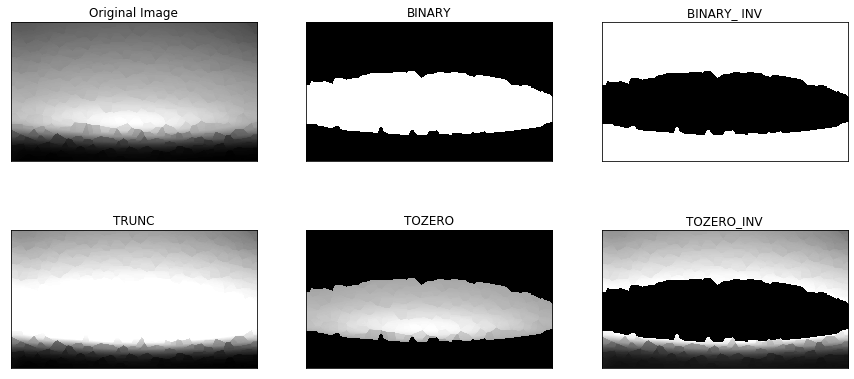

In [9]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import tool
import pylab
%matplotlib inline
pylab.rcParams['figure.figsize'] = (15.0, 7.0) #调整显示大小
# tool.setGrid(1,1)

img = cv.imread('./opencv_dataset_01/cv_1101.png' ,0) #灰色图像
# imageRGB = cv.cvtColor(img,cv.COLOR_BGR2RGB)
# plt.imshow(imageRGB)
# plt.show()

ret,thresh1 = cv.threshold(img, 127, 255, cv.THRESH_BINARY)
ret,thresh2 = cv.threshold(img, 127, 255, cv.THRESH_BINARY_INV)
ret,thresh3 = cv.threshold(img, 127, 255, cv.THRESH_TRUNC)
ret,thresh4 = cv.threshold(img, 127, 255, cv.THRESH_TOZERO)
ret,thresh5 = cv.threshold(img, 127, 255, cv.THRESH_TOZERO_INV)
titles = ['Original Image' ,'BINARY' ,'BINARY_ INV','TRUNC' ,'TOZERO' ,'TOZERO_INV']
images = [img,thresh1, thresh2, thresh3, thresh4, thresh5]
for i in range(6) :
    plt.subplot (2, 3, i+1)
    plt.imshow (images[i],'gray' )
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()




##  P38 自适应阈值
自适应阈值(Adaptive Thresholding )

算法根据像素周围的小区域来确定像素的阈值  
因此，对于同-幅图像的不同区域，我们得到了不同的阈值  

cv.adaptiveThreshold(scr, maxValue, adaptiveMethod, thresholdType, blockSize, C)

- dst: 自适应阈值处理结果
- scr:要进行处理的原始图像，该图像必须是八位单通道图像
- maxValue: 最大值
- adaptiveMethod: 代表自适应方法
- thresholdType: 代表阈值处理方式，可以是cv.THRESH_BINARY或cv.THRESH_BINARY_INV
- blockSize:代表块大小，表示-个像素在计算阈值时所使用的的邻域尺寸，通常为3、5、7等
- C是常量(阈值为区域内的点加权平均后减去常量c的值)


<function matplotlib.pyplot.show(*args, **kw)>

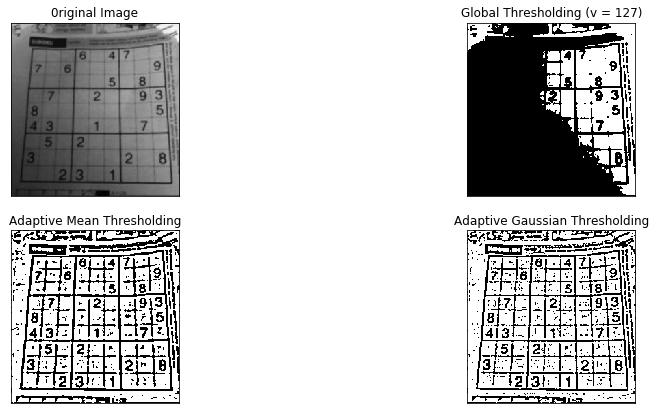

In [18]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import tool
import pylab
%matplotlib inline
pylab.rcParams['figure.figsize'] = (15.0, 7.0) #调整显示大小
# tool.setGrid(1,1)

img = cv.imread('./opencv_dataset_01/cv_1106.JPG',0) #灰色图像
ret, th1 = cv.threshold (img, 127, 255, cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold (img, 255, cv.ADAPTIVE_THRESH_MEAN_C, \
            cv.THRESH_BINARY, 11,2) # 平均值
th3 = cv.adaptiveThreshold (img, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, \
            cv.THRESH_BINARY, 11,2) # 高斯
titles = ['0riginal Image' ,'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding' ,'Adaptive Gaussian Thresholding' ]
images = [img, th1, th2, th3]
for i in range(4) :
    plt.subplot(2, 2, i+1), plt.imshow(images[i],'gray' ) 
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt. show


## P39 Otsu阈值
Otsu's阈值(Otsu's Binarization)  
当阈值范围无法人工确定时，可以使用Otsu的方法通过计算确定阈值

图像像素分布直方图为双峰直方图，找到个位于两个峰值之间的阈值  
使得这两个类的方差(weighted within-class variance)最小


[matplotlib subplot 子图](https://blog.csdn.net/claroja/article/details/70841382)

189.0


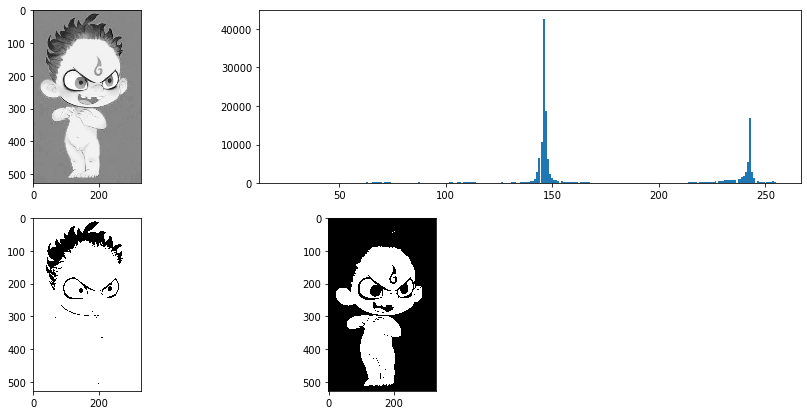

In [12]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import tool
import pylab
%matplotlib inline
pylab.rcParams['figure.figsize'] = (15.0, 7.0) #调整显示大小
tool.setGrid(2,3)

img = cv.imread('./opencv_dataset_01/cv_1118.jpg' ,0) #灰色图像
tool.pltGrid(1,1)
plt.imshow (img,'gray' )
# plt.show()

tool.pltGrid(2,1,colspan=2)
plt.hist(img.ravel(), 256)

tool.pltGrid(1,2)
ret1, img1 = cv.threshold(img, 127, 255, cv.THRESH_BINARY) 
plt.imshow(img1,'gray' )


ret2, img2 = cv.threshold (img, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)
tool.pltGrid(2,2)
plt.imshow(img2,"gray" )
print(ret2)

plt.show()


## P40 Otsu阈值原理推导
t:阈值  
I: 总区间


$
σ_w^2(t) = q_1(t)σ_1^2+q_2(t)σ_2^2(t)\\
\begin{align}
q_1(t) = \sum\limits_{i=1}^t P(i) \quad &\& \quad q_2(t)=\sum\limits_{i=t+1}^I P(i) & // 权重\\
μ_1(t) = \sum\limits_{i=1}^t \frac{i P(i)}{q_1(t)} \quad &\& \quad μ_2(t)=\sum\limits_{i=t+1}^{I}\frac{iP(i)}{q_2(t)} & // 数值乘以权重\\
σ_1^2(t) = \sum\limits_{i=1}^t[i-μ_1(t)]^2 \frac{P(i)}{q_1(t)} \quad &\& 
\quad σ_2^2(t) = \sum\limits_{i=t+1}^I[i-μ_2(t)]^2 \frac{P(i)}{q_2(t)} & // 计算方差
\end{align}
$

## P40 Otsu阈值代码实现


In [34]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import tool
import pylab
%matplotlib inline
pylab.rcParams['figure.figsize'] = (15.0, 7.0) #调整显示大小
# tool.setGrid(2,3)


#读取图像
img = cv.imread('./opencv_dataset_01/cv_1118.jpg' ,0) #灰色图像

#统计点的个数ni
hist = cv.calcHist([img], [0], None, [256], [0, 256])
# ni/N=pi 正则化
hist_norm = hist.ravel() /hist.max()

# Q=pi之和
Q = hist_norm.cumsum()

#相当于i
bins = np.arange (256)

#方差的初始值，设为极大值
fn_min=np.inf#极大值

#阈值的初始值，设为-1
thresh = -1


for i in range(1, 256):
    p1,p2 = np.hsplit(hist_norm, [i])
    q1,q2 = Q[i], Q[255]-Q[i]
    b1,b2 = np.hsplit(bins, [i])
    
    #求均值与方差
    m1,m2 = np.sum(p1*b1)/q1, np.sum(p2*b2)/q2
    v1,v2 = np.sum(((b1-m1)**2)*p1) /q1, np.sum(((b2- m2)**2) *p2) /q2

    fn = v1*q1 + v2*q2
    if fn < fn_min:
        fn_min = fn
        thresh = i
#使用0penCV函数找到0tsu阈值
ret, otsu = cv.threshold(img, 0, 255, cv.THRESH_BINARY+cv. THRESH_OTSU)
print( "{} {}". format (thresh, ret) )


189 189.0


<ipython-input-34-2185e8bf6926>:38: RuntimeWarning: invalid value encountered in double_scalars
  m1,m2 = np.sum(p1*b1)/q1, np.sum(p2*b2)/q2
<ipython-input-34-2185e8bf6926>:38: RuntimeWarning: divide by zero encountered in double_scalars
  m1,m2 = np.sum(p1*b1)/q1, np.sum(p2*b2)/q2
<ipython-input-34-2185e8bf6926>:41: RuntimeWarning: invalid value encountered in double_scalars
  fn = v1*q1 + v2*q2


## P42 图像的平滑处理
*图像模糊(图像平滑)*
在尽量保留图像原有信息的情况下，过滤掉图像内部的噪声

OpenCV主要提供四种类型的模糊技术
1. 均值滤波(Averaging)
cv.blur()  
通过卷积图像与一个标准化的框式滤波器，取内核区域下所有像素的平均值并替换中心元素  
如:  
$
K=\frac{1}{9}
\begin{bmatrix}
1 & 1 & 1 \\
1 & 1 & 1 \\
1 & 1 & 1
\end{bmatrix}
$

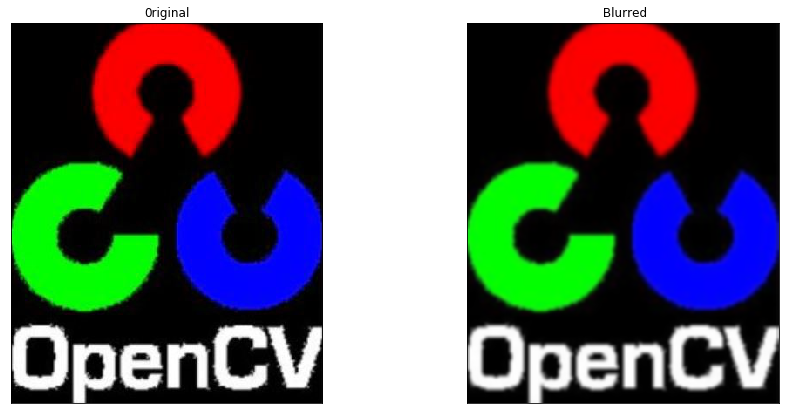

In [38]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import tool
import pylab
%matplotlib inline
pylab.rcParams['figure.figsize'] = (15.0, 7.0) #调整显示大小
# tool.setGrid(2,3)

img = cv.imread('./opencv_dataset_01/cv_1201.JPG' ,1) #彩色图像
blur = cv.blur(img, (5,5)) 
plt.subplot (121), plt.imshow (img), plt.title('0riginal')
plt.([]),plt.yticks([])
plt.subplot(122), plt.imshow (blur), plt.title(' Blurred' )
plt.xticks([]), plt.yticks([])
plt.show()


## P43 高斯滤波
高斯滤波(Gaussian Blurring)  
在进行均值滤波时，其邻域内每个像素的权重是相等的  
在高斯滤波中，会将中心点的权重值加大(正态分布)，远离中心点的权重值减小，在此基础上计算领域内各个像素值不同权重的和。  
cv.gaussianblur()

- dst =cv.GaussianBlur(src,ksize ,sigmaX\[, dst\[, sigmaY\[, borderTyel\]\]\])
- src:输入图像，通道数不限，深度为CV_8U, CV_16U, CV_16S, CV_32F orCV_64F. //深度什么意思 范围吗
- dst:输出图像
- ksize: 高斯内核的大小(Gaussian kernel size) ，宽(ksize.width) 和高(ksize.height) 可以不同，但是必须为正的奇数,或者设置为0然后通过sigma计算出来
- sigmaX: x方向的Gaussian kernel|标准差standard deviation in X direction
- sigmaY: Y方向的Gaussian kernel表准差，如果sigmaY为0, 默认等于sigmaX
- 如果sigmaX, sigmaY都为0， 会根据ksize.width和ksize.height计算
- borderType: 边界扩张的方法


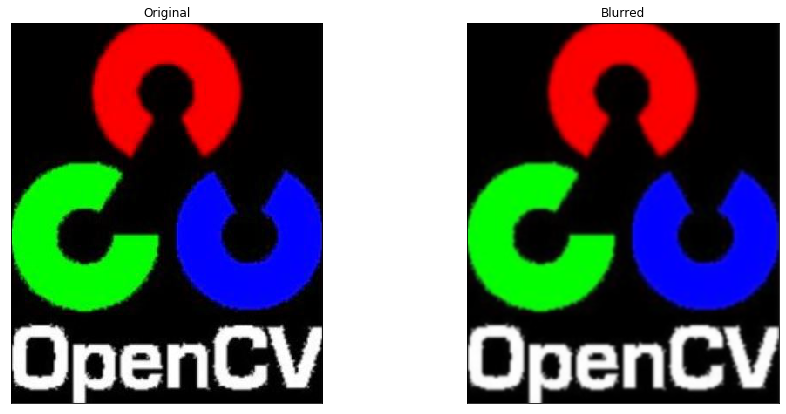

In [43]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import tool
import pylab
%matplotlib inline
pylab.rcParams['figure.figsize'] = (15.0, 7.0) #调整显示大小
# tool.setGrid(2,3)

img = cv.imread('./opencv_dataset_01/cv_1201.JPG' ,1) #彩色图像
blur = cv.GaussianBlur(img, (5, 5),0)
plt.subplot (121), plt.imshow(img), plt.title('Original' )
plt.xticks([]),plt.yticks([])
plt.subplot (122), plt.imshow (blur), plt.title('Blurred' )
plt.xticks([]),plt.yticks([])
plt.show()


## P44 中值滤波
中值滤波(Median Blurring)  
cv.medianBlur()  
取内核区域下所有像素的中值，然后用这个中值替换中心元素  
在上面的过滤器中，中心元素是一个新计算的值，它可以是图像中的像素值，也可以是一个新值  
但是在中值模糊中，中心元素总是被图像中的某个像素值所代替  
它的内核大小应该是一个正奇数  
在这个演示中，我们给原始图像添加了50%的噪点，并应用了中值模糊.  


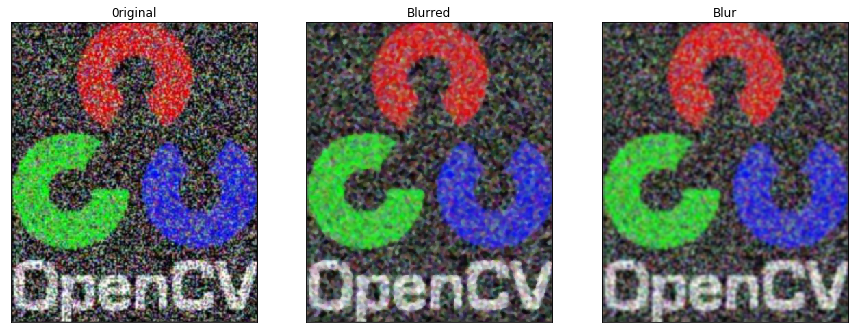

In [58]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import tool
import pylab
%matplotlib inline
pylab.rcParams['figure.figsize'] = (15.0, 7.0) #调整显示大小
# tool.setGrid(2,3)

img = cv.imread('./opencv_dataset_01/cv_1202.JPG',1) #彩色图像
median = cv.medianBlur (img, 5)
plt.subplot (131),plt.imshow (img),plt.title('0riginal' )
plt.xticks([]),plt.yticks([])
plt.subplot(132), plt.imshow(median), plt.title('Blurred' )
plt.xticks([]),plt.yticks([])
blur = cv.blur(img, (5,5)) 
plt.subplot(133), plt.imshow(blur), plt.title('Blur' )
plt.xticks([]),plt.yticks([])

plt.show()


## P45 双边滤波